<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [8]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49

In [169]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, kstest
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Classifiers
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import decomposition
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [6]:
!git clone https://github.com/BentheBurema/TM10007_ML_Project_group14.git

Cloning into 'TM10007_ML_Project_group14'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 141 (delta 32), reused 32 (delta 18), pack-reused 83
Receiving objects: 100% (141/141), 72.89 MiB | 30.93 MiB/s, done.
Resolving deltas: 100% (60/60), done.


## Data loading

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [10]:
# Data loading functions.
from worcliver.load_data import load_data
data = load_data()

## Inspecting data

In [11]:
# Count number of None types
print(f"Number of None types: {data.isnull().sum().sum()}")
# Count number of NaN values
print(f"Number of NaN values: {data.isna().sum().sum()}")
# print number of samples, features and feature names
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)}')
# print(f'Feature names: {data.columns}')

# Check if the dataset is balanced
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

# Check normal distribution
Y = data['label']
X = data.drop('label', axis=1)

p_values = {}
for key,values in X.items():

  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
#for key, p_value in p_values.items():
    #print(f"{key}: {p_value}")

# If p<0.05 is not normally distributed, if p>0.05 it is normally distributed
count_less_than_005 = sum(p_value < 0.05 for p_value in p_values.values())
count_greater_than_005 = sum(p_value > 0.05 for p_value in p_values.values())

print(f"Amount of featuers not normally distributed: {count_less_than_005}")
print(f"Amount of features normally distributed: {count_greater_than_005}")

Number of None types: 0
Number of NaN values: 0
The number of samples: 186
The number of features: 494
The percentage of tumors that is malignant is 50.53763440860215
Amount of featuers not normally distributed: 493
Amount of features normally distributed: 0


## Splitting dataset in training set and test set

TEKST TOEVOEGEN

In [125]:
Y = data['label']
X = data.drop('label', axis=1)

# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in X_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

display(X_train.head())

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in X_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
ID,,,,,,,,,,,,,,,,,,,,,
Liver-149_0,0.824583,0.055989,30.099345,4.415992,3.661071,1.861613,0.963279,0.022393,0.021571,0.011780,...,0.000000,0.104107,2.756906,8.453818,0.0,0,0.409805,222.558113,0.042636,11.809102
Liver-132_0,0.801146,0.092439,62.217271,5.375470,6.822246,2.509137,0.924549,0.049767,0.007751,0.002992,...,0.000000,0.100082,3.289330,11.458823,0.0,0,0.412003,2198.965478,0.000000,14.737962
Liver-018_0,0.784347,0.051682,29.057589,5.423131,8.776120,6.493751,0.967914,0.015269,0.035515,0.011933,...,0.015554,0.152348,1.301602,0.810392,0.0,0,0.526233,678.343564,0.211135,12.903202
Liver-135_0,0.762971,0.071214,39.719594,6.220513,8.349609,4.035151,0.944998,0.031507,0.028765,0.017286,...,0.000000,0.108344,1.929157,3.090863,0.0,0,0.391573,1168.726859,0.088960,14.316269
Liver-015_0,0.836579,0.075738,61.507831,7.303462,11.104662,3.733124,0.952526,0.027722,0.016664,0.011443,...,0.000000,0.078725,3.747019,15.215261,0.0,0,0.332604,1306.631943,0.000000,14.384808


## Preprocessing

### Outliers

In [126]:
# Checking on outliers using interquartile range
def define_outliers(feature):
  sorted_feature = np.sort(feature)
  Q1 = np.percentile(feature, 25)
  Q3 = np.percentile(feature, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
  outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
  return outliers, outliers_total_column, lower_bound, upper_bound

# Performing the above functions on the train set
outliers_total = 0
for column in X_train.columns:
  outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
  outliers_total += outliers_total_column
  #print(f'There are {outliers_total_column} outliers in {column}')
  #print(f'Outliers in column {column}: {outliers.tolist()}')
print(f'In total there are {outliers_total} outliers')

In total there are 3061 outliers


### RobustScaling



In [131]:
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
display(X_train_scaled)

,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
0,0.150296,-0.083205,0.099730,0.089899,-1.058300,-0.476649,0.045225,-0.052978,-0.109704,-0.021825,...,0.000000,-0.330843,0.309445,0.473745,0.0,0.0,-0.354875,-0.152410,-0.081206,-0.164787
1,-0.127922,0.781934,1.792621,0.378484,-0.259736,-0.174771,-1.414650,1.345585,-0.838904,-0.825469,...,0.000000,-0.423064,0.739756,0.920217,0.0,0.0,-0.336526,2.028847,-0.365157,0.887215
2,-0.327347,-0.185417,0.044821,0.392819,0.233845,1.682868,0.219966,-0.416930,0.626040,-0.007810,...,0.015554,0.774336,-0.866747,-0.661885,0.0,0.0,0.617012,0.350617,1.040992,0.228197
3,-0.581096,0.278172,0.606800,0.632650,0.126101,0.536661,-0.643838,0.412653,0.269877,0.481679,...,0.000000,-0.233779,-0.359551,-0.323062,0.0,0.0,-0.507068,0.891827,0.227313,0.735749
4,0.292704,0.385532,1.755228,0.958371,0.822072,0.395855,-0.360083,0.219305,-0.368603,-0.052610,...,0.000000,-0.912327,1.109664,1.478334,0.0,0.0,-0.999315,1.044026,-0.365157,0.760368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.615278,0.973719,-0.336274,-0.337860,0.775214,0.933081,-0.703379,0.402549,-0.031703,-0.085362,...,0.000000,0.889975,-0.678754,-0.588581,0.0,0.0,0.709133,0.016578,0.820758,-0.186765
144,0.021065,-0.596739,-0.091249,-0.061713,-0.881172,-0.614146,-0.093740,-0.230227,-0.052376,-0.306254,...,0.000000,-0.259418,0.070833,0.124304,0.0,0.0,-0.366311,-0.215185,-0.127769,-0.357984
145,0.974585,-0.192204,-0.623555,-0.781988,-0.365637,-1.033495,0.652983,-0.358634,-0.677209,-0.414594,...,0.000000,0.403232,-0.272030,-0.235882,0.0,0.0,0.410870,-0.186285,0.315605,-0.441251
146,-0.126470,0.811006,0.552248,0.423965,0.308189,0.431616,-0.318080,0.993962,0.186422,0.678426,...,0.000000,-0.939571,1.149966,1.536196,0.0,0.0,-1.066743,-0.188571,-0.365157,-0.240316


### Remove zero variance featuers

In [142]:
vt = VarianceThreshold()
X_train_var = vt.fit_transform(X_train_scaled)

# Selecteer de juiste kolommen uit X_train_scaled
selected_columns = X_train_scaled.columns[vt.get_support()]

# Maak een DataFrame van de getransformeerde dataset met de geselecteerde kolomnamen
X_train_var = pd.DataFrame(X_train_var, columns=selected_columns)

print(X_train_var.shape)

(148, 476)


### ANOVA test

(148, 476)
[(7.703233524943642e-05, 'PREDICT_original_logf_kurtosis_sigma1'), (0.000295888724361588, 'PREDICT_original_tf_Gabor_peak_F0.05_A2.36'), (0.0003143090631695308, 'PREDICT_original_tf_Gabor_skewness_F0.5_A0.0'), (0.000757283280003258, 'PREDICT_original_logf_median_sigma1'), (0.000757283280003258, 'PREDICT_original_logf_peak_sigma1'), (0.000902829515775476, 'PREDICT_original_tf_LBP_quartile_range_R8_P24'), (0.0009394946098244116, 'PREDICT_original_logf_quartile_range_sigma5'), (0.0013562532188967909, 'PREDICT_original_logf_quartile_range_sigma10'), (0.0013670316799248917, 'PREDICT_original_tf_Gabor_skewness_F0.2_A0.0'), (0.0013989717546907196, 'PREDICT_original_tf_LBP_std_R3_P12'), (0.0019830539074110506, 'PREDICT_original_logf_quartile_range_sigma1'), (0.00217851727693402, 'PREDICT_original_tf_Gabor_skewness_F0.2_A0.79'), (0.0021952437076800265, 'PREDICT_original_tf_Gabor_kurtosis_F0.5_A0.0'), (0.0022414547771940434, 'PREDICT_original_sf_area_min_2.5D'), (0.002583357485309703,

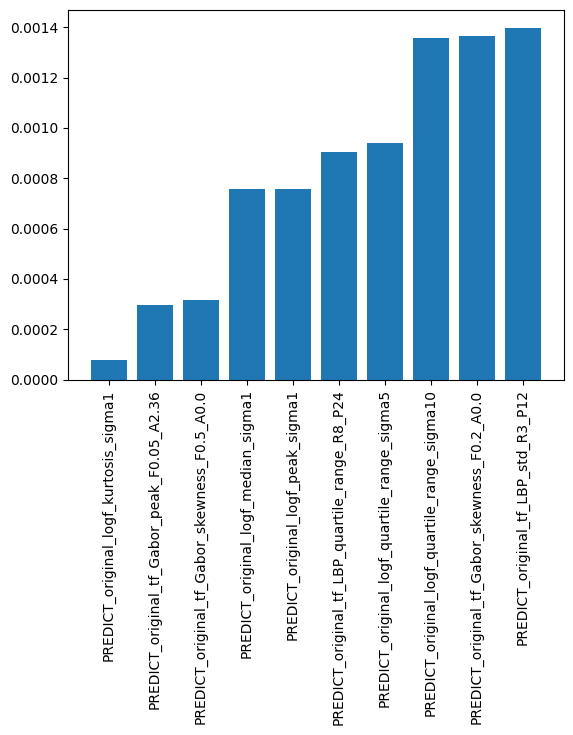

In [158]:
# ANOVA feature selection for numeric input and categorical output

# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')
# apply feature selection
X_train_anova = fs.fit_transform(X_train_var, Y_train)
X_train_anova = pd.DataFrame(data=X_train_anova, columns=X_train_var.columns)
print(X_train_anova.shape)

# de ANOVA test verwerken
feature_scores = list(zip(fs.pvalues_, X_train_anova.columns))
sorted_feature_scores = sorted(feature_scores,reverse=False)
print(sorted_feature_scores)

# weergeven beste 10 (met dus lage p-waarde) in histogram: features op x-as, p-waarde op y-as
num_list = []
col_list = []
for i in range(len(X_train_anova.columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores [i])[1])
plt.bar(col_list[0:10],num_list[0:10])
plt.xticks(rotation=90)

# Features selecteren met p-waarde kleiner dan 0.05, want dan is benigne significant verschillend van maligne
selected_features = [feature[1] for feature in feature_scores if feature[0] < 0.05]

# Filter de DataFrame om alleen geselecteerde features te behouden
X_train_selected = X_train_anova[selected_features]

print("Aantal geselecteerde features met p-waarde < 0.05:", len(selected_features))

In [171]:
# Maak een instantie van LabelEncoder
label_encoder = LabelEncoder()

# Pas LabelEncoder toe op de kolom met de klassen --> malignant =1, benigne = 0
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Bekijk de unieke gecodeerde klassen
print("Unieke gecodeerde klassen:", label_encoder.classes_)

# Bekijk de eerste 10 gecodeerde labels
print("Gecodeerde labels voor de eerste 10 voorbeelden:", Y_train_encoded[:10])

min_features_to_select = 1  # Minimum number of features to consider
clf = DecisionTreeClassifier(random_state=0)
# clf = RandomForestClassifier(random_state=0) WE MOETEN EVEN GOED ONDERBOUWEN WELKE TYPE CLASSIFIER WE HET BESTE KUNNEN GEBRUIKEN VOOR RFECV
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="recall",
    min_features_to_select=min_features_to_select
)
rfecv.fit(X_train_selected, Y_train_encoded)

print(f"Optimal number of features: {rfecv.n_features_}")

# summarize all features
for i in range(X_train_selected.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))


 # Lijst met geselecteerde features
selected_features = X_train_selected.columns[rfecv.support_]

# Afdrukken van de geselecteerde features
print("Selected features:")
for feature in selected_features:
    print(feature)

Unieke gecodeerde klassen: ['benign' 'malignant']
Gecodeerde labels voor de eerste 10 voorbeelden: [1 1 0 0 1 0 1 0 1 1]
Optimal number of features: 41
Column: 0, Selected False, Rank: 20.000
Column: 1, Selected False, Rank: 19.000
Column: 2, Selected False, Rank: 18.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 7.000
Column: 19, Selected False, Rank: 2.000
Column: 20, Selected False, Rank: 4.000
Column: 21, Selected False, Ra